In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [ ]:
dl_file=tfds.download.DownloadManager(download_dir='/content/sample_data')

In [ ]:
plant=dl_file.download_and_extract('https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip')

In [ ]:
!unzip /content/sample_data/extracted/ZIP.md-data-cach-zipf-prod.s3.eu-west-1_tywb-1OAX1Gq-RqqeVcEQluIZ-WScw5j9Get4HuYeJesqkdrg.zip/Plant_leaf_diseases_dataset_with_augmentation.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_with_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1326).JPG  
  infl

In [ ]:
batch_size = 64
img_height = 200
img_width = 200

# **Corn Data**

In [ ]:
mkdir corn_data

In [ ]:
mv Plant_leave_diseases_dataset_with_augmentation/Corn* corn_data

In [ ]:
corn_data= '/content/corn_data'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  corn_data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 4354 files belonging to 4 classes.
Using 3048 files for training.


In [ ]:
val_da=tf.keras.preprocessing.image_dataset_from_directory(
    corn_data,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 4354 files belonging to 4 classes.
Using 1306 files for validation.


In [ ]:
class_names=train_ds.class_names

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_da=val_da.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 4

cm = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
cm.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = cm.fit(
  train_ds,
  validation_data=val_da,
  epochs=15
  )

Epoch 1/15
48/48 [==============================] - 4s 74ms/step - loss: 0.8414 - accuracy: 0.6591 - val_loss: 0.3346 - val_accuracy: 0.8515
Epoch 2/15
48/48 [==============================] - 2s 33ms/step - loss: 0.3343 - accuracy: 0.8307 - val_loss: 0.2784 - val_accuracy: 0.8706
Epoch 3/15
48/48 [==============================] - 2s 33ms/step - loss: 0.2694 - accuracy: 0.8747 - val_loss: 0.2660 - val_accuracy: 0.8721
Epoch 4/15
48/48 [==============================] - 2s 33ms/step - loss: 0.2375 - accuracy: 0.8901 - val_loss: 0.2722 - val_accuracy: 0.8813
Epoch 5/15
48/48 [==============================] - 2s 33ms/step - loss: 0.2064 - accuracy: 0.9058 - val_loss: 0.2542 - val_accuracy: 0.8737
Epoch 6/15
48/48 [==============================] - 2s 33ms/step - loss: 0.1657 - accuracy: 0.9268 - val_loss: 0.2185 - val_accuracy: 0.9096
Epoch 7/15
48/48 [==============================] - 2s 33ms/step - loss: 0.1351 - accuracy: 0.9429 - val_loss: 0.1977 - val_accuracy: 0.9150
Epoch 8/15
48

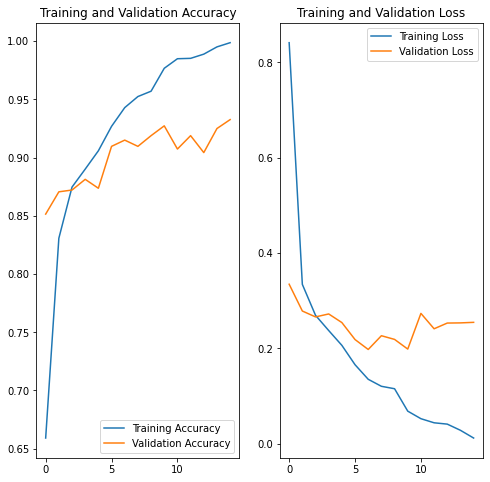

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#!mkdir -p saved_model
#model.save('saved_model/CornModel.h5') 

# **Apple Model**

In [ ]:
mkdir apple_data

In [ ]:
mv Plant_leave_diseases_dataset_with_augmentation/Apple* apple_data

In [ ]:
apple_data= '/content/apple_data'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
  apple_data,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 4645 files belonging to 4 classes.
Using 3252 files for training.


In [ ]:
val_da1=tf.keras.preprocessing.image_dataset_from_directory(
    apple_data,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 4645 files belonging to 4 classes.
Using 1393 files for validation.


In [ ]:
class_names=train_ds1.class_names

In [ ]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds1=train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_da1=val_da1.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 4

am = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
am.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=15
history1 = model.fit(
  train_ds1,
  validation_data=val_da1,
  epochs=15
  )

Epoch 1/15
51/51 [==============================] - 4s 77ms/step - loss: 1.1146 - accuracy: 0.5787 - val_loss: 0.6726 - val_accuracy: 0.7638
Epoch 2/15
51/51 [==============================] - 2s 33ms/step - loss: 0.4031 - accuracy: 0.8582 - val_loss: 0.3075 - val_accuracy: 0.9024
Epoch 3/15
51/51 [==============================] - 2s 33ms/step - loss: 0.2357 - accuracy: 0.9173 - val_loss: 0.2614 - val_accuracy: 0.9153
Epoch 4/15
51/51 [==============================] - 2s 33ms/step - loss: 0.1728 - accuracy: 0.9413 - val_loss: 0.2644 - val_accuracy: 0.9002
Epoch 5/15
51/51 [==============================] - 2s 33ms/step - loss: 0.1096 - accuracy: 0.9649 - val_loss: 0.1837 - val_accuracy: 0.9404
Epoch 6/15
51/51 [==============================] - 2s 33ms/step - loss: 0.0744 - accuracy: 0.9763 - val_loss: 0.1646 - val_accuracy: 0.9454
Epoch 7/15
51/51 [==============================] - 2s 33ms/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 0.1485 - val_accuracy: 0.9526
Epoch 8/15
51

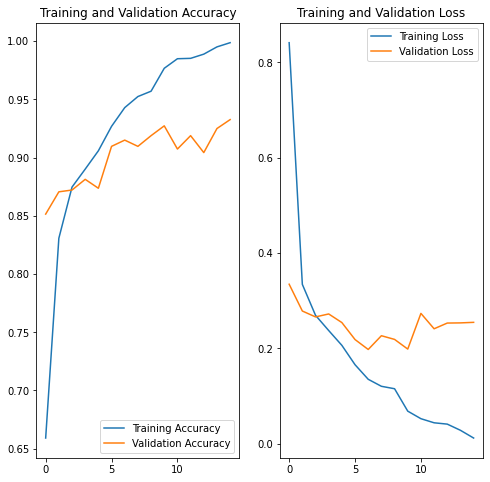

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# !mkdir -p saved_model
# model.save('saved_model/AM.h5') 